In [ ]:
# Ch04-1 - NumPy as the engine behind Python data science

In [ ]:
# Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
# Read in the data
vdata = pd.read_csv( 
    "data/2021VAERSDATA.csv.gz", encoding="iso-8859-1", low_memory=False) 

In [ ]:
# Determine the top states
vdata["STATE"] = vdata["STATE"].str.upper()  # make state upper case
# Create a dataframe called top_states to hold our results
top_states = pd.DataFrame({ 
    "size": vdata.groupby("STATE").size().sort_values(ascending=False).head(5)
}).reset_index() 
top_states["rank"] = top_states.index 
top_states = top_states.set_index("STATE") 
# Use .copy() to create dataframe top_vdata with the VAERS data from just the top states
top_vdata = vdata[vdata["STATE"].isin(top_states.index)].copy()
# Now add the state_code column 
top_vdata["state_code"] = top_vdata["STATE"].apply( 
    lambda state: top_states["rank"].at[state] 
).astype(np.uint8) 
top_vdata = top_vdata[top_vdata["AGE_YRS"].notna()].copy()  # Remove data with empty age
top_vdata.loc[:,"AGE_YRS"] = top_vdata["AGE_YRS"].astype(int) # Convert age to integer
top_states # Print out the top states

In [ ]:
# Extract numpy arrays that contain Age and State data
age_state = top_vdata[["state_code", "AGE_YRS"]] # create a dataframe with age and state data from top_vdata
age_state["state_code"]  # show the state code column

In [ ]:
state_code_arr = age_state["state_code"].values # Create a numpy array of the state code values
type(state_code_arr), state_code_arr.shape, state_code_arr.dtype # Show the type of this array

In [16]:
age_arr = age_state["AGE_YRS"].values # Create a numpy array of the age values
type(age_arr), age_arr.shape, age_arr.dtype # Show the type of the array

(numpy.ndarray, (198290,), dtype('float64'))

In [19]:
# Create a numpy matrix from scratch 
age_state_mat = np.zeros((5, 6), dtype=np.uint64)  # Create a matrix to count occurrences
# Loop over the data
for row in age_state.itertuples(index=False):
    # Convert to int 
    state_code = int(row.state_code)
    age_bin = min(int(row.AGE_YRS // 20), 5)
    # Ensure indices are within bounds
    if 0 <= state_code < 5 and 0 <= age_bin < 6:
        age_state_mat[state_code, age_bin] += 1
age_state_mat  # print out the results - number of events in each age bin per State

array([[ 5535, 17607, 21406, 16680,  2662,    24],
       [ 1601,  7151, 11258, 14650,  2762,    11],
       [ 3199, 10568, 13285,  9253,  1334,     2],
       [ 2556,  9826, 11701,  9630,  1632,    14],
       [ 1591,  6213,  8124,  6956,  1052,     7]], dtype=uint64)

In [20]:
cal = age_state_mat[0,:] # extract a single row
kids = age_state_mat[:,0] # extract a single column

In [21]:
# Compute a new matrix with the fraction of cases per age group
def compute_frac(arr_1d): 
    return arr_1d / arr_1d.sum() 
frac_age_stat_mat = np.apply_along_axis(compute_frac, 1, age_state_mat) 

In [23]:
# Create a new matrix with percentages
perc_age_stat_mat = frac_age_stat_mat * 100 
perc_age_stat_mat = perc_age_stat_mat.astype(np.uint8) 
perc_age_stat_mat 

array([[ 8, 27, 33, 26,  4,  0],
       [ 4, 19, 30, 39,  7,  0],
       [ 8, 28, 35, 24,  3,  0],
       [ 7, 27, 33, 27,  4,  0],
       [ 6, 25, 33, 29,  4,  0]], dtype=uint8)

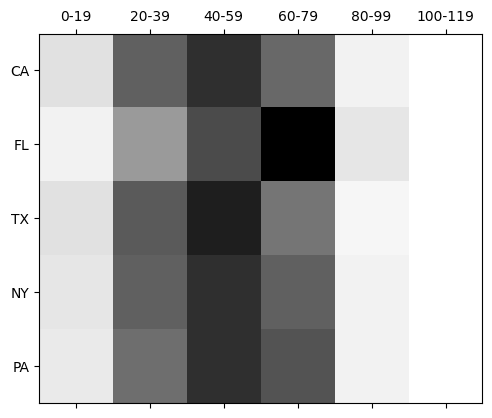

In [24]:
# Create a graphical representation using matplotlib
fig = plt.figure() # initialize a figure
ax = fig.add_subplot()  # create a plot within the figure
ax.matshow(perc_age_stat_mat, cmap=plt.get_cmap("Greys")) # Display a greyscale matrix
# Set the tick marks and labels for the Y and X axis
ax.set_yticks(range(5))  
ax.set_yticklabels(top_states.index) 
ax.set_xticks(range(6)) 
ax.set_xticklabels(["0-19", "20-39", "40-59", "60-79", "80-99", "100-119"]) 
fig.savefig("matrix.png") # Save the figure

In [ ]:
## End of Notebook ##